In [71]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.max_rows = 60
pd.options.display.max_columns = 20

In [73]:
data = pd.read_excel('..\\data\\raw\\Master.xlsx')

In [74]:
data.shape

(21107, 76)

In [76]:
# 필요없는 컬럼 제외
rm_columns1 = ['Transaction Name', 'Acquiree Name', 'Acquirer Name', 
               'EE_Announced Date', 'EE_Acquired by', 'EE_Headquarters Regions', 'EE_Funding Status', 'EE_Last Funding Type', 'EE_Last Equity Funding Type', 
               'ER_Announced Date', 'ER_Acquired by', 'ER_Headquarters Regions', 'ER_Funding Status', 'ER_Last Funding Type', 'ER_Last Equity Funding Type']
data2 = data.drop(rm_columns1, axis=1)

# Industry Group, HQ Location, # of Employees 없는 경우 제외
dropNA1 = ['EE_Industry Groups', 'EE_Headquarters Location', 'EE_Number of Employees', 'ER_Industry Groups', 'ER_Headquarters Location', 'ER_Number of Employees']
data2 = data2.dropna(subset=dropNA1)

In [77]:
data2.shape

(16785, 61)

In [79]:
check1 = pd.DataFrame(data2.isna().sum())

In [80]:
check1

,0
Announced Date,0
EE_Organization Name,0
EE_Founded Date,0
EE_Industry Groups,0
EE_Industries,0
EE_Headquarters Location,0
EE_Number of Founders,6379
EE_Number of Employees,0
EE_Number of Articles,6479
EE_Average Visits (6 months),12255


In [82]:
data2.to_excel('..\\data\\preprocessed\\data2.xlsx', index=False)

In [86]:
#피인수 컬럼
EE_columns = ['EE_Organization Name',
'EE_Founded Date',
'EE_Industry Groups',
'EE_Industries',
'EE_Headquarters Location',
'EE_Number of Founders',
'EE_Number of Employees',
'EE_Number of Articles',
'EE_Average Visits (6 months)',
'EE_Visit Duration',
'EE_Page Views / Visit',
'EE_Active Tech Count',
'EE_Patents Granted',
'EE_Trademarks Registered',
'EE_Total Products Active',
'EE_IT Spend Currency (in USD)',
'EE_Number of Apps',
'EE_Downloads Last 30 Days',
'EE_Estimated Revenue Range',
'EE_Number of Funding Rounds',
'EE_Last Funding Amount Currency (in USD)',
'EE_Last Equity Funding Amount Currency (in USD)',
'EE_Total Equity Funding Amount Currency (in USD)',
'EE_Total Funding Amount Currency (in USD)',
'EE_Number of Portfolio Organizations',
'EE_Number of Investments',
'EE_Number of Lead Investments',
'EE_Number of Diversity Investments',
'EE_Number of Lead Investors',
'EE_Number of Investors']
#인수 컬럼
ER_columns = ['ER_Organization Name',
'ER_Founded Date',
'ER_Industry Groups',
'ER_Industries',
'ER_Headquarters Location',
'ER_Number of Founders',
'ER_Number of Employees',
'ER_Number of Articles',
'ER_Average Visits (6 months)',
'ER_Visit Duration',
'ER_Page Views / Visit',
'ER_Active Tech Count',
'ER_Patents Granted',
'ER_Trademarks Registered',
'ER_Total Products Active',
'ER_IT Spend Currency (in USD)',
'ER_Number of Apps',
'ER_Downloads Last 30 Days',
'ER_Estimated Revenue Range',
'ER_Number of Funding Rounds',
'ER_Last Funding Amount Currency (in USD)',
'ER_Last Equity Funding Amount Currency (in USD)',
'ER_Total Equity Funding Amount Currency (in USD)',
'ER_Total Funding Amount Currency (in USD)',
'ER_Number of Portfolio Organizations',
'ER_Number of Investments',
'ER_Number of Lead Investments',
'ER_Number of Diversity Investments',
'ER_Number of Lead Investors',
'ER_Number of Investors']

In [94]:
EE = data2[EE_columns]
ER = data2[ER_columns]

In [142]:
#직원 수 중앙 값으로 변경
#피인수
EE['EE_Number of Employees'].replace('01-10', 5, inplace=True)
EE['EE_Number of Employees'].replace('11-50', 30, inplace=True)
EE['EE_Number of Employees'].replace('51-100', 75, inplace=True)
EE['EE_Number of Employees'].replace('101-250', 175, inplace=True)
EE['EE_Number of Employees'].replace('251-500', 375, inplace=True)
EE['EE_Number of Employees'].replace('501-1000', 750, inplace=True)
EE['EE_Number of Employees'].replace('1001-5000', 3000, inplace=True)
EE['EE_Number of Employees'].replace('5001-10000', 7500, inplace=True)
EE['EE_Number of Employees'].replace('10001+', 10000, inplace=True)
#인수
ER['ER_Number of Employees'].replace('01-10', 5, inplace=True)
ER['ER_Number of Employees'].replace('11-50', 30, inplace=True)
ER['ER_Number of Employees'].replace('51-100', 75, inplace=True)
ER['ER_Number of Employees'].replace('101-250', 175, inplace=True)
ER['ER_Number of Employees'].replace('251-500', 375, inplace=True)
ER['ER_Number of Employees'].replace('501-1000', 750, inplace=True)
ER['ER_Number of Employees'].replace('1001-5000', 3000, inplace=True)
ER['ER_Number of Employees'].replace('5001-10000', 7500, inplace=True)
ER['ER_Number of Employees'].replace('10001+', 10000, inplace=True)

In [148]:
#EE['EE_Number of Employees'], ER['ER_Number of Employees']

In [144]:
# 수익 중앙 값으로 변경
# 피인수
EE['EE_Estimated Revenue Range'].replace('Less than $1M', 1, inplace=True)
EE['EE_Estimated Revenue Range'].replace('$1M to $10M', 5, inplace=True)
EE['EE_Estimated Revenue Range'].replace('$10M to $50M', 25, inplace=True)
EE['EE_Estimated Revenue Range'].replace('$50M to $100M', 75, inplace=True)
EE['EE_Estimated Revenue Range'].replace('$100M to $500M', 300, inplace=True)
EE['EE_Estimated Revenue Range'].replace('$500M to $1B', 750, inplace=True)
EE['EE_Estimated Revenue Range'].replace('$1B to $10B', 5000, inplace=True)
EE['EE_Estimated Revenue Range'].replace('$10B+', 10000, inplace=True)
# 인수
ER['ER_Estimated Revenue Range'].replace('Less than $1M', 1, inplace=True)
ER['ER_Estimated Revenue Range'].replace('$1M to $10M', 5, inplace=True)
ER['ER_Estimated Revenue Range'].replace('$10M to $50M', 25, inplace=True)
ER['ER_Estimated Revenue Range'].replace('$50M to $100M', 75, inplace=True)
ER['ER_Estimated Revenue Range'].replace('$100M to $500M', 300, inplace=True)
ER['ER_Estimated Revenue Range'].replace('$500M to $1B', 750, inplace=True)
ER['ER_Estimated Revenue Range'].replace('$1B to $10B', 5000, inplace=True)
ER['ER_Estimated Revenue Range'].replace('$10B+', 10000, inplace=True)

In [149]:
#EE['EE_Estimated Revenue Range'], ER['ER_Estimated Revenue Range']

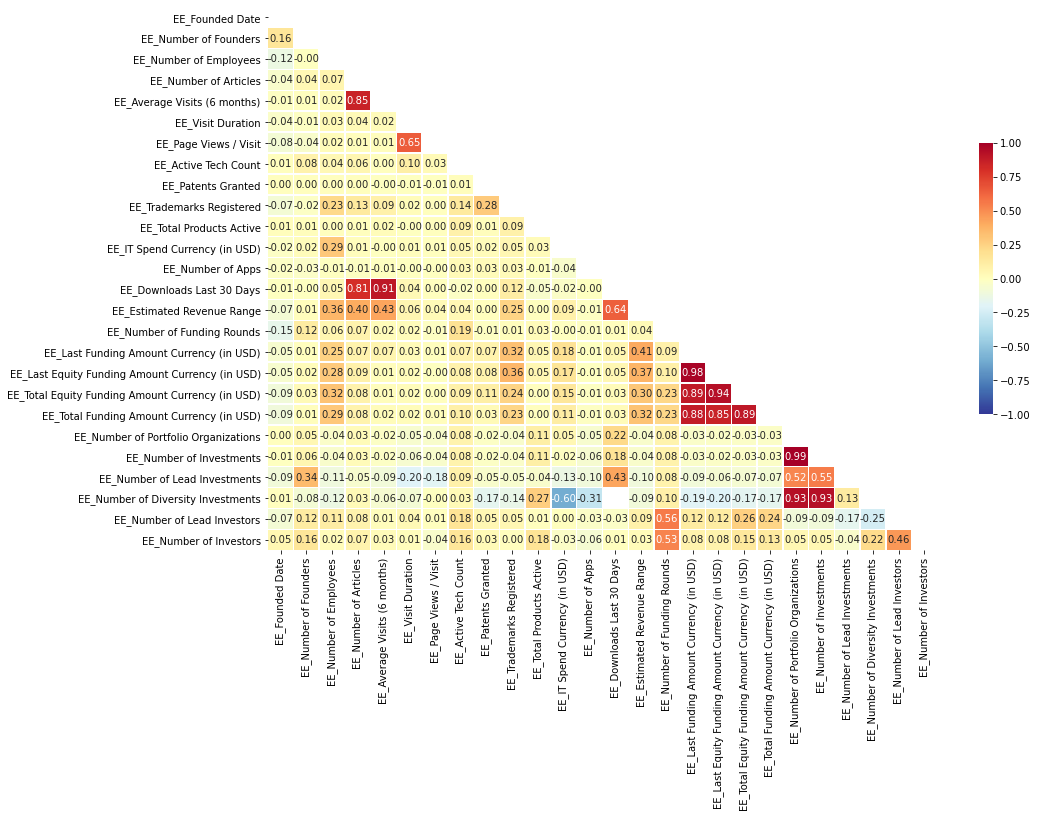

In [146]:
#피인수 상관계수 그래프 - 전체

plt.figure(figsize=(15, 10))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(EE.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(EE.corr(), annot=True, fmt='.2f', cmap='RdYlBu_r', mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1)

plt.show()

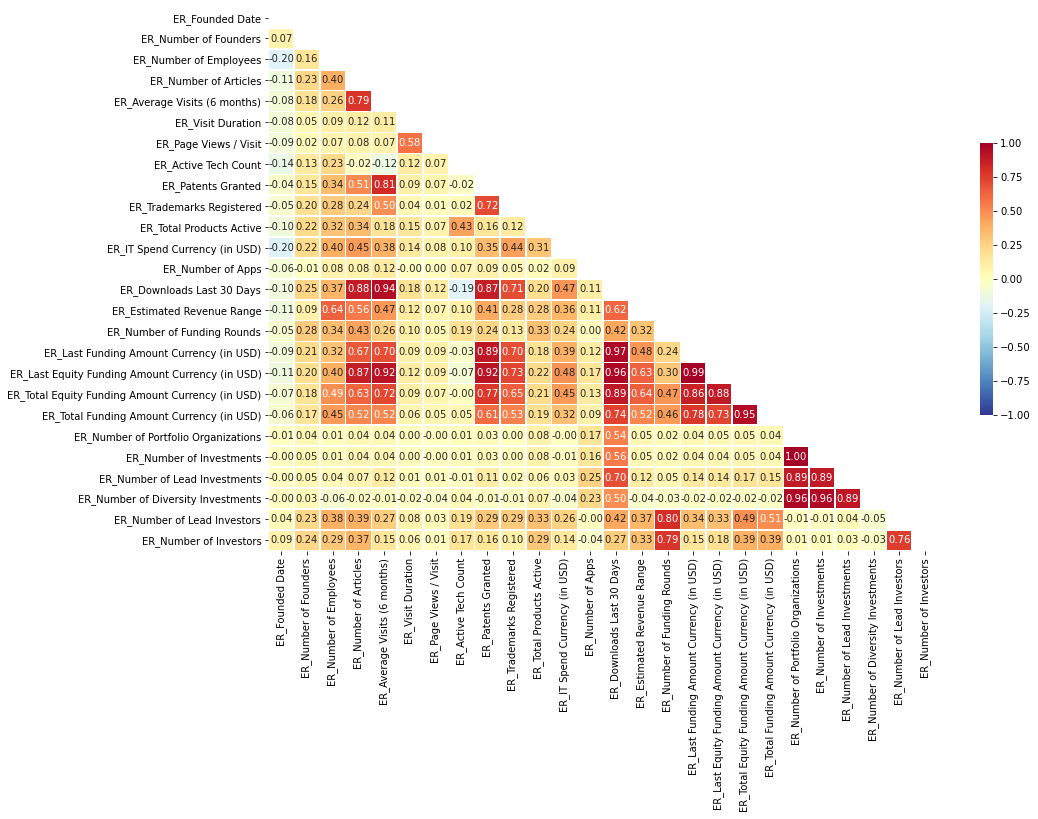

In [147]:
#인수 상관계수 그래프 - 전체
plt.figure(figsize=(15, 10))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(ER.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(ER.corr(), annot=True, fmt='.2f', cmap='RdYlBu_r', mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1)

plt.show()

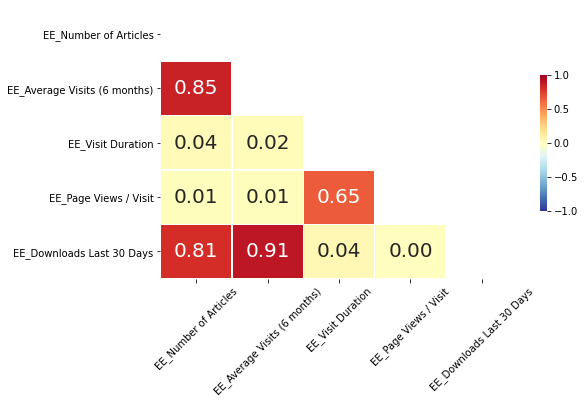

In [172]:
# 피인수 상관계수 그래프 - 기업인지도
EE_Famous = EE[['EE_Number of Articles', 'EE_Average Visits (6 months)', 'EE_Visit Duration', 'EE_Page Views / Visit', 'EE_Downloads Last 30 Days']]

plt.figure(figsize=(8,5))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(EE_Famous.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(EE_Famous.corr(), annot=True, annot_kws={"size": 20}, fmt='.2f', cmap='RdYlBu_r', mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1)
plt.xticks(rotation=45)
plt.show()

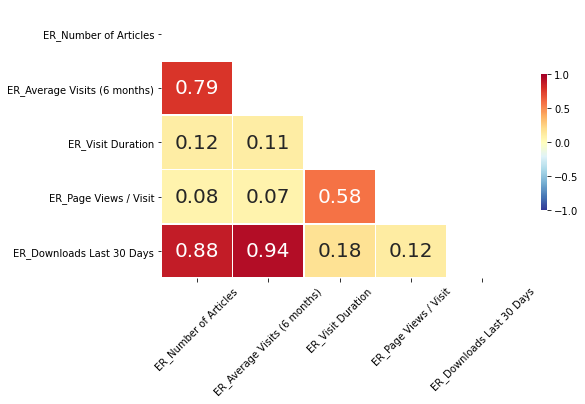

In [171]:
# 인수 상관계수 그래프 - 기업인지도
ER_Famous = ER[['ER_Number of Articles', 'ER_Average Visits (6 months)', 'ER_Visit Duration', 'ER_Page Views / Visit', 'ER_Downloads Last 30 Days']]

plt.figure(figsize=(8,5))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(ER_Famous.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(ER_Famous.corr(), annot=True, annot_kws={"size": 20}, fmt='.2f', cmap='RdYlBu_r', mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1)
plt.xticks(rotation=45)
plt.show()

In [216]:
IT_indust = []
for i in range(len(EE)):
    if np.isnan(EE.iloc[i]['EE_IT Spend Currency (in USD)']) == True:
        IT_indust.append(EE.iloc[i]['EE_Industry Groups'])

In [236]:
IT_indust[0].split(", ")

['Mobile', 'Transportation']

In [237]:
IT_industry_Count = []

for i in IT_indust:
    temp = i.split(", ")
    for j in range(len(temp)):
        IT_industry_Count.append(temp[j])

In [258]:
from collections import Counter
Counter(IT_industry_Count).most_common()

[('Software', 6405),
 ('Internet Services', 3493),
 ('Information Technology', 3407),
 ('Media and Entertainment', 2362),
 ('Sales and Marketing', 2355),
 ('Commerce and Shopping', 1982),
 ('Mobile', 1892),
 ('Data and Analytics', 1881),
 ('Hardware', 1730),
 ('Health Care', 1621),
 ('Financial Services', 1617),
 ('Other', 1519),
 ('Advertising', 1344),
 ('Professional Services', 1302),
 ('Science and Engineering', 1282),
 ('Apps', 1135),
 ('Content and Publishing', 744),
 ('Transportation', 721),
 ('Community and Lifestyle', 700),
 ('Consumer Electronics', 695),
 ('Privacy and Security', 673),
 ('Design', 672),
 ('Artificial Intelligence', 612),
 ('Education', 583),
 ('Video', 580),
 ('Real Estate', 577),
 ('Food and Beverage', 563),
 ('Biotechnology', 553),
 ('Administrative Services', 495),
 ('Gaming', 490),
 ('Payments', 476),
 ('Manufacturing', 475),
 ('Travel and Tourism', 474),
 ('Sports', 409),
 ('Platforms', 400),
 ('Messaging and Telecommunications', 374),
 ('Energy', 321),
 

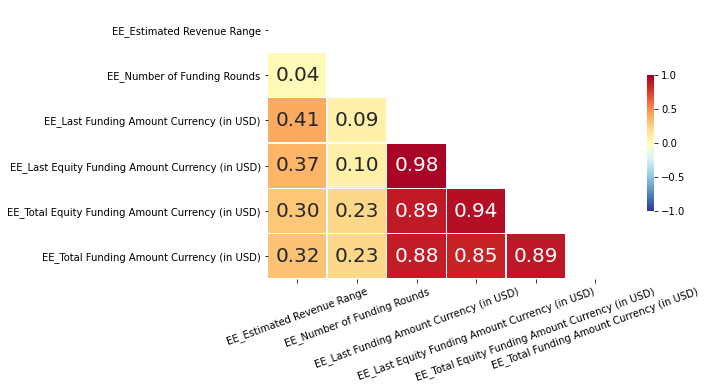

In [228]:
# 피인수 상관계수 그래프 - 펀딩상태
EE_Funding = EE[['EE_Estimated Revenue Range', 'EE_Number of Funding Rounds', 'EE_Last Funding Amount Currency (in USD)', 'EE_Last Equity Funding Amount Currency (in USD)', 'EE_Total Equity Funding Amount Currency (in USD)', 'EE_Total Funding Amount Currency (in USD)']]

plt.figure(figsize=(8,5))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(EE_Funding.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(EE_Funding.corr(), annot=True, annot_kws={"size": 20}, fmt='.2f', cmap='RdYlBu_r', mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1)
plt.xticks(rotation=20)
plt.show()

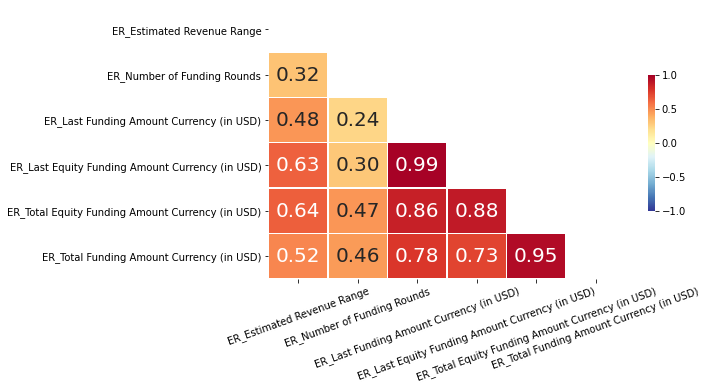

In [227]:
# 인수 상관계수 그래프 - 펀딩상태
ER_Funding = ER[['ER_Estimated Revenue Range', 'ER_Number of Funding Rounds', 'ER_Last Funding Amount Currency (in USD)', 'ER_Last Equity Funding Amount Currency (in USD)', 'ER_Total Equity Funding Amount Currency (in USD)', 'ER_Total Funding Amount Currency (in USD)']]

plt.figure(figsize=(8,5))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(ER_Funding.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(ER_Funding.corr(), annot=True, annot_kws={"size": 20}, fmt='.2f', cmap='RdYlBu_r', mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1)
plt.xticks(rotation=20)
plt.show()

In [222]:
EE['EE_Estimated Revenue Range'].value_counts()

5.0        3193
1.0        1288
25.0       1142
300.0       183
75.0        173
750.0        32
5000.0       27
10000.0       1
Name: EE_Estimated Revenue Range, dtype: int64

In [225]:
ER['ER_Number of Funding Rounds'].value_counts()

1.0     2592
2.0     1690
3.0     1221
4.0     1111
5.0      977
6.0      869
7.0      683
8.0      565
9.0      359
10.0     258
11.0     239
12.0     170
18.0     166
13.0     133
14.0      58
17.0      48
15.0      37
16.0      33
19.0      29
28.0      22
24.0      19
26.0      16
21.0      15
23.0      13
36.0      10
32.0      10
20.0      10
29.0      10
34.0       3
25.0       2
41.0       1
51.0       1
Name: ER_Number of Funding Rounds, dtype: int64

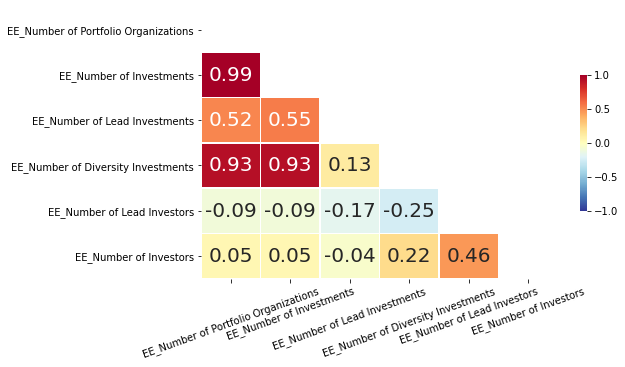

In [226]:
# 피인수 상관계수 그래프 - 투자규모
EE_Invest = EE[['EE_Number of Portfolio Organizations', 'EE_Number of Investments', 'EE_Number of Lead Investments', 'EE_Number of Diversity Investments', 'EE_Number of Lead Investors', 'EE_Number of Investors']]

plt.figure(figsize=(8,5))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(EE_Invest.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(EE_Invest.corr(), annot=True, annot_kws={"size": 20}, fmt='.2f', cmap='RdYlBu_r', mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1)
plt.xticks(rotation=20)
plt.show()

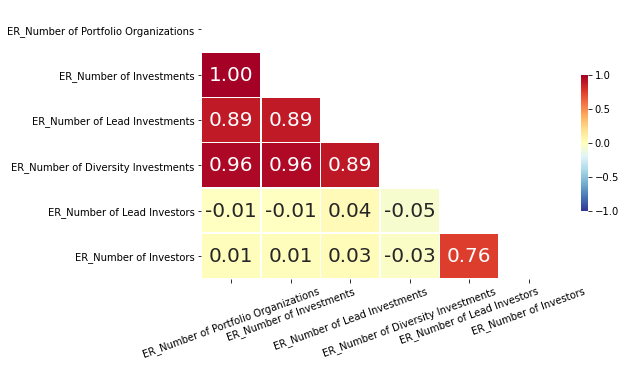

In [229]:
# 인수 상관계수 그래프 - 투자규모
ER_Invest = ER[['ER_Number of Portfolio Organizations', 'ER_Number of Investments', 'ER_Number of Lead Investments', 'ER_Number of Diversity Investments', 'ER_Number of Lead Investors', 'ER_Number of Investors']]

plt.figure(figsize=(8,5))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(ER_Invest.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(ER_Invest.corr(), annot=True, annot_kws={"size": 20}, fmt='.2f', cmap='RdYlBu_r', mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1)
plt.xticks(rotation=20)
plt.show()

In [231]:
EE['EE_Number of Investors'].value_counts()

1.0     2107
2.0     1145
3.0      834
4.0      603
5.0      469
6.0      405
7.0      280
8.0      238
9.0      191
10.0     168
11.0     118
12.0     114
13.0      81
14.0      72
15.0      59
17.0      52
16.0      49
18.0      25
19.0      22
22.0      21
20.0      20
21.0      15
23.0      11
24.0       7
25.0       7
26.0       5
35.0       5
29.0       3
32.0       3
28.0       3
34.0       2
48.0       2
27.0       2
31.0       2
33.0       2
39.0       1
63.0       1
56.0       1
30.0       1
37.0       1
41.0       1
Name: EE_Number of Investors, dtype: int64